<a href="https://colab.research.google.com/github/sathvikeppakayala/predictive_analytics/blob/house_price_prediction/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Head:
   square_footage  bedrooms  bathrooms  year_built   price
0            1500         3        2.0        2000  250000
1            2000         4        3.0        1995  350000
2            1200         2        1.5        2010  200000
3            1800         3        2.5        2005  300000
4            2500         4        3.5        1990  450000

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   square_footage  10 non-null     int64  
 1   bedrooms        10 non-null     int64  
 2   bathrooms       10 non-null     float64
 3   year_built      10 non-null     int64  
 4   price           10 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 532.0 bytes

Dataset Description:
       square_footage   bedrooms  bathrooms   year_built          price
count       10.000000  10.000000  10.000000    10.00

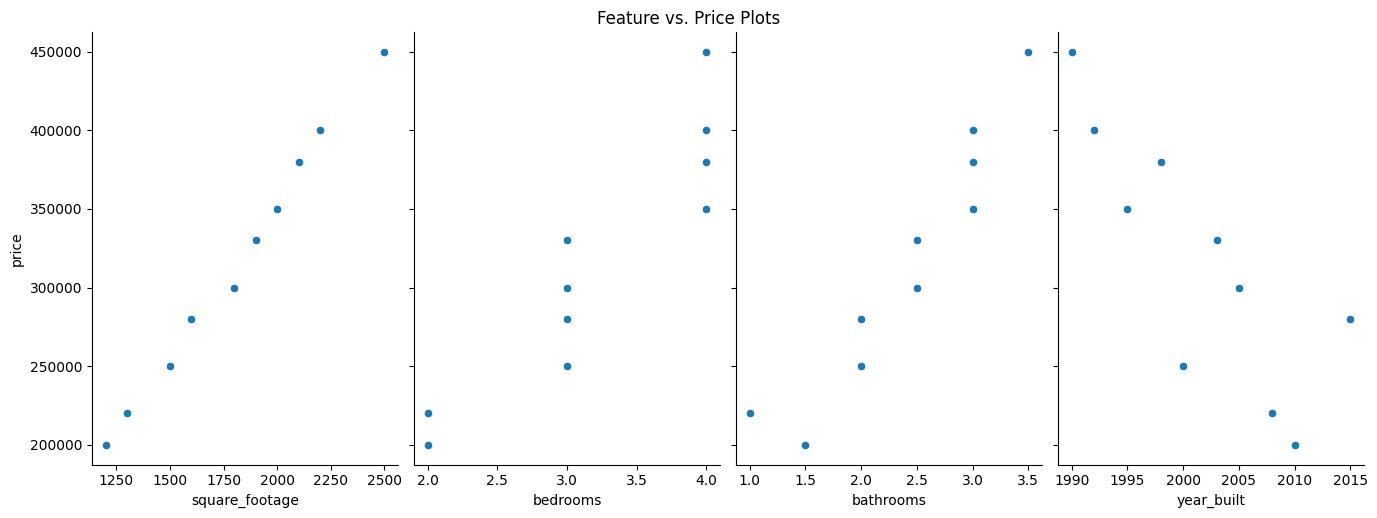

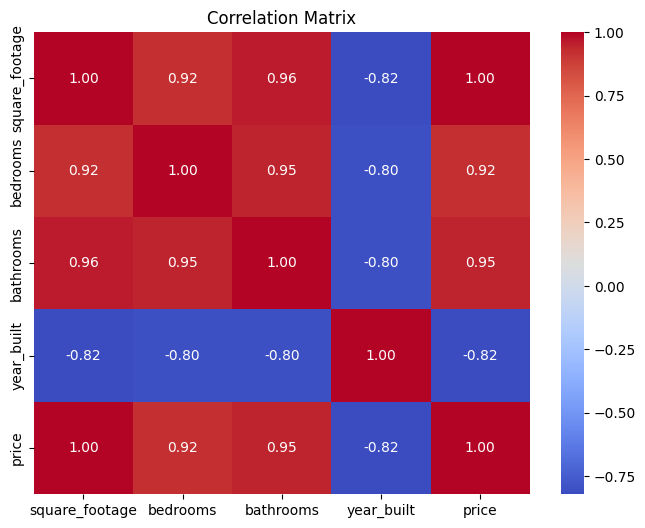

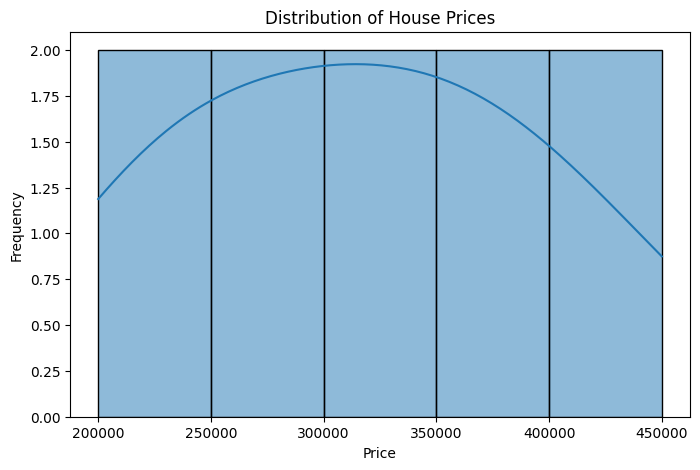


--- Model Evaluation Metrics ---
Mean Squared Error (MSE): 13153874.64
Root Mean Squared Error (RMSE): 3626.83
R-squared (R2): 0.87


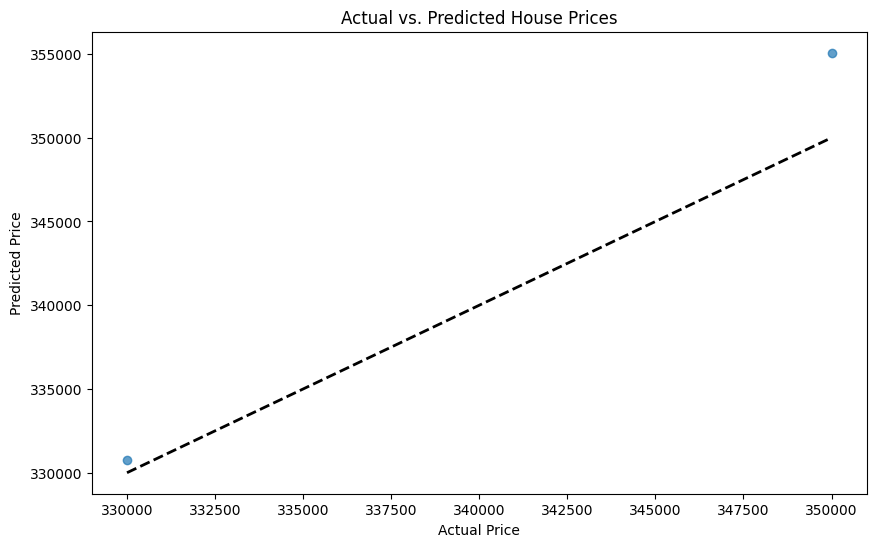

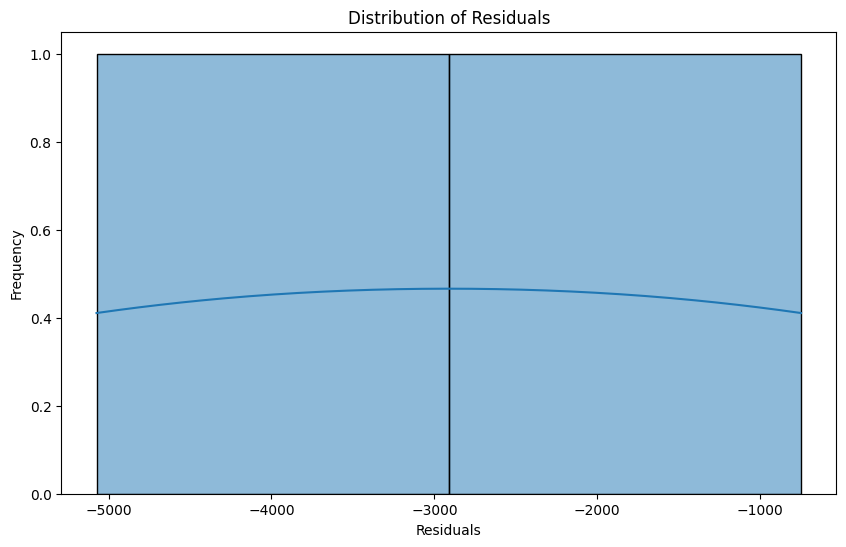

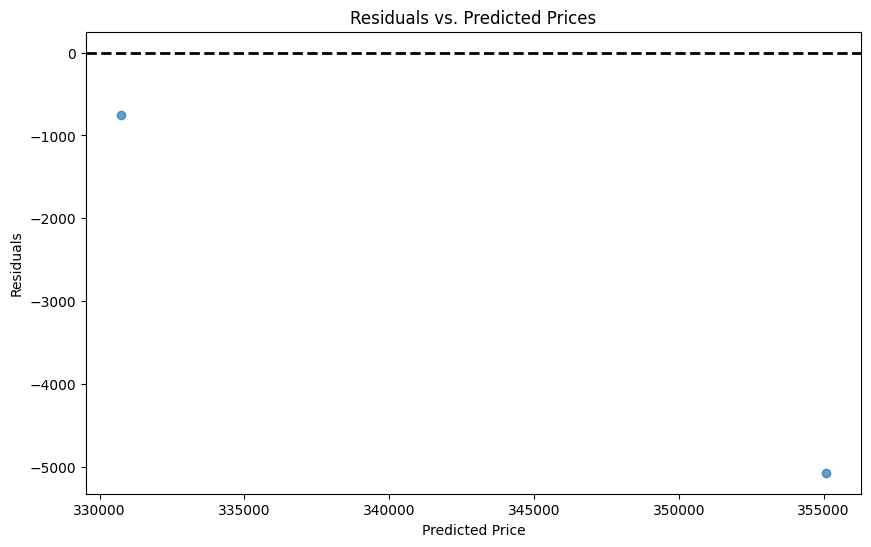

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# --- Data Loading and Exploration ---

# Load the dataset
# For this example, let's create a dummy dataset. In a real scenario,
# you would load your dataset from a CSV, Excel, etc.
# Example: df = pd.read_csv('house_data.csv')

data = {
    'square_footage': [1500, 2000, 1200, 1800, 2500, 1600, 1300, 2100, 1900, 2200],
    'bedrooms': [3, 4, 2, 3, 4, 3, 2, 4, 3, 4],
    'bathrooms': [2, 3, 1.5, 2.5, 3.5, 2, 1, 3, 2.5, 3],
    'year_built': [2000, 1995, 2010, 2005, 1990, 2015, 2008, 1998, 2003, 1992],
    'price': [250000, 350000, 200000, 300000, 450000, 280000, 220000, 380000, 330000, 400000]
}
df = pd.DataFrame(data)

print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nDataset Description:")
print(df.describe())

# --- Data Visualization ---

# Pairplot to visualize relationships between numerical features and price
sns.pairplot(df, x_vars=['square_footage', 'bedrooms', 'bathrooms', 'year_built'], y_vars='price', height=5, aspect=0.7)
plt.suptitle('Feature vs. Price Plots', y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Distribution of the target variable (price)
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# --- Data Preprocessing ---

# Define features (X) and target (y)
X = df[['square_footage', 'bedrooms', 'bathrooms', 'year_built']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional but often recommended for many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model Training ---

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# --- Model Evaluation ---

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation Metrics ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# --- Visualization of Predictions vs. Actual ---

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted House Prices')
plt.show()

# Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.show()

